# Reading and Understanding the Data

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
## Reading the data
lead = pd.read_csv('leads.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'leads.csv'

In [ ]:
## The head of the data set
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [ ]:
## The shape of the data set
lead.shape

(9240, 37)

In [ ]:
## The info of the data set
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
## The details of numerical columns
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data Cleaning and Missing value check

In [ ]:
# Checking for duplicated in Data
lead.duplicated().sum()

0

In [ ]:
# Checking the Columns having "Select"
cols = lead.isin(['Select']).any().any()
cols

True

In [ ]:
cols = lead.columns[lead.isin(['Select']).any()].tolist()
cols

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [ ]:
## Imputation with "Nan" as customer have not choosen the option from drop down
lead = lead.replace('Select', np.nan)

In [ ]:
## Checking the null in dataset
lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [ ]:
# Checking the percentage of null in the datset
round(lead.isnull().mean().sort_values(ascending=False)*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [ ]:
col_missing_40_per = lead.isnull().mean().sort_values(ascending=False)*100

In [ ]:
# Columns having more than 40% missing values
col_to_drop = col_missing_40_per[col_missing_40_per >= 40].index
col_to_drop

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index'],
      dtype='object')

In [ ]:
## dropping columns having more than 40% missing values
lead_df = lead.drop(col_to_drop,axis=1)

In [ ]:
# Checking the shape after dropping the columns
lead_df.shape

(9240, 30)

In [ ]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [ ]:
## Remaining Columns after drop
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Checking the null values after dropping some columns
lead_df.isnull().mean().sort_values(ascending=False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [ ]:
# Columns with categorical variable
categorical_cols = lead_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [ ]:
# Columns with numerical variable
numerical_cols = lead_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

#### Missing value treatment for columns having less than 40% missing values

In [ ]:
# Categorical Variable Imputation
## Imputation of missing values with mode(highest value counts)

In [ ]:
lead_df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
mod=lead_df["City"].mode()[0]

In [ ]:
lead_df["City"]=lead_df["City"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
lead_df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
## Combing low value counts rows in one category for easy imputation
lead_df["Tags"]=lead_df["Tags"].replace(['Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others')

In [ ]:
## Rechecking the value counts after replacing with 'Others'
lead_df["Tags"].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Others                                 1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

In [ ]:
mod=lead_df["Tags"].mode()[0]

In [ ]:
lead_df["Tags"]=lead_df["Tags"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df["Tags"].value_counts()

Will revert after reading the email    5425
Ringing                                1203
Others                                 1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

In [ ]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
## Replacing the duplicated value
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')

In [ ]:
## Rechecking the value counts after replacing
lead_df["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
## Combing low value counts rows in one category for easy imputation
lead_df["Lead Source"]=lead_df["Lead Source"].replace(['Referral Sites','Facebook','bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [ ]:
## Rechecking the value counts after replacement
lead_df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: Lead Source, dtype: int64

In [ ]:
mod=lead_df["Lead Source"].mode()[0]

In [ ]:
lead_df["Lead Source"]=lead_df["Lead Source"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: Lead Source, dtype: int64

In [ ]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
## Combing low value counts rows in one category for easy imputation
lead_df["Last Activity"]=lead_df["Last Activity"].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [ ]:
## Rechecking the value counts after replacement
lead_df["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [ ]:
mod=lead_df['Last Activity'].mode()[0]

In [ ]:
lead_df["Last Activity"]=lead_df["Last Activity"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [ ]:
lead_df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [ ]:
## Imputation of missing values with 'Others'
lead_df["Specialization"].fillna('Others',inplace=True)

In [ ]:
## Rechecking the value counts after imputation
lead_df["Specialization"].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
## Imputation of missing values with 'Other'
lead_df['What is your current occupation'].fillna('Other',inplace=True)

In [ ]:
## Rechecking the value counts after imputation
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
mod=lead_df["What matters most to you in choosing a course"].mode()[0]

In [ ]:
lead_df["What matters most to you in choosing a course"]=lead_df["What matters most to you in choosing a course"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
# Dropping the columns because of data imbalance
lead_df =lead_df.drop('What matters most to you in choosing a course',axis=1)

In [ ]:
# Checking the shape after dropping
lead_df.shape

(9240, 29)

In [ ]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
mod=lead_df["Country"].mode()[0]

In [ ]:
lead_df["Country"]=lead_df["Country"].fillna(mod)

In [ ]:
## Rechecking the value counts after imputation
lead_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
# Dropping the columns because of data imbalance
lead_df =lead_df.drop('Country',axis=1)

In [ ]:
# Checking the shape after dropping
lead_df.shape

(9240, 28)

In [ ]:
# Rechecking the dataset after categorical variable imputation
lead_df.isnull().mean().sort_values(ascending=False)*100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
Search                                      0.000000
What is your current occupation             0.

In [ ]:
## # Numerical Variable Imputation
## Imputation of missing values with median

In [ ]:
## Rechecking the column after imputation
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
med = lead_df['TotalVisits'].median()

In [ ]:
lead_df["TotalVisits"]=lead_df["TotalVisits"].fillna(med)

In [ ]:
lead_df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
med=lead_df['Page Views Per Visit'].median()

In [ ]:
lead_df["Page Views Per Visit"]=lead_df["Page Views Per Visit"].fillna(med)

In [ ]:
## Rechecking the column after imputation
lead_df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
# Rechecking the dataset after numerical variable imputation
lead_df.isnull().mean().sort_values(ascending=False)*100

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [ ]:
## Removing the 'Prospect ID' and 'Lead Number' as they are just IDs
lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [ ]:
lead_df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  ...  \
0  Page Visited on Website                   Others  ...   
1             Email Opened                   Others  ...   
2             Email Opened  Business Administration  ...   
3                   Others    Media and Advertising  ...   
4        Converted to Lead                   Others  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 26 columns]

## Exploratory Data Analysis (EDA)

In [ ]:
### Univariate Analysis

In [ ]:
#### Categorical Variables

In [ ]:
lead_df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

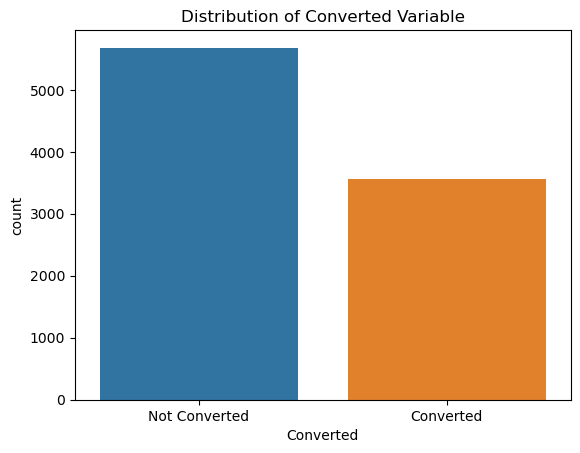

In [ ]:
## Visualising converted data
fig, axes = plt.subplots()
sns.countplot(x='Converted',data=lead_df)
axes.set_xticks([0, 1])
axes.set_xticklabels(['Not Converted', 'Converted'])
axes.set_title('Distribution of Converted Variable')
plt.show()

In [ ]:
# The number of not converted is more compared to converted

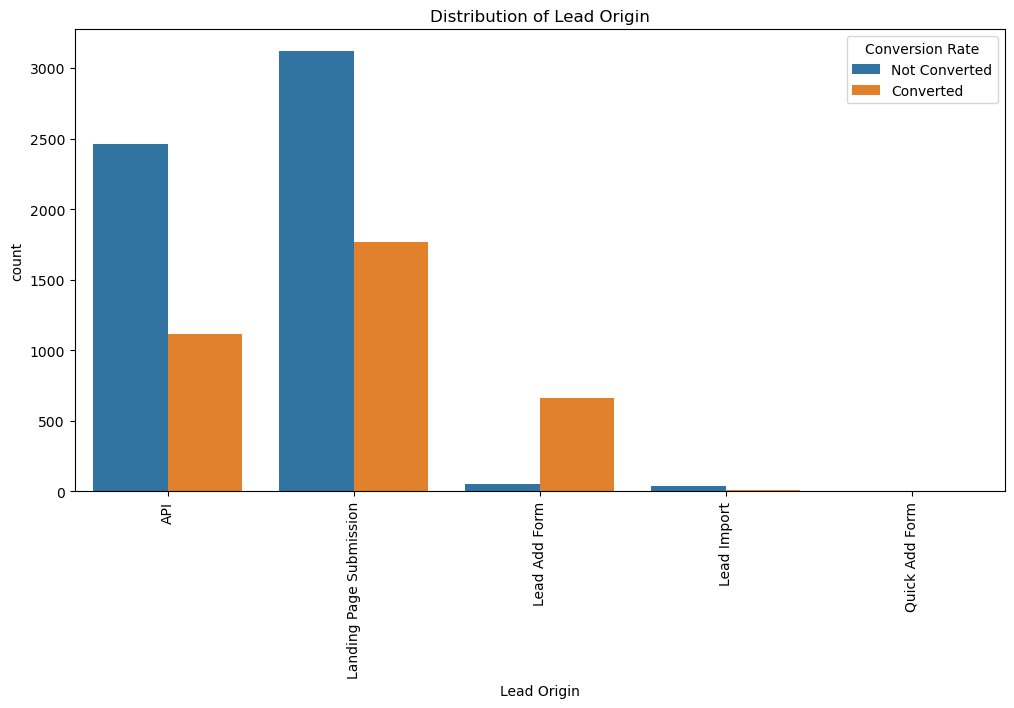

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Lead Origin",hue="Converted")
plt.title("Distribution of Lead Origin")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# Landing Page Submission has maximum number of lead origin followed by API
# Landing Page Submission has high conversion rate followed by API, Lead Add form

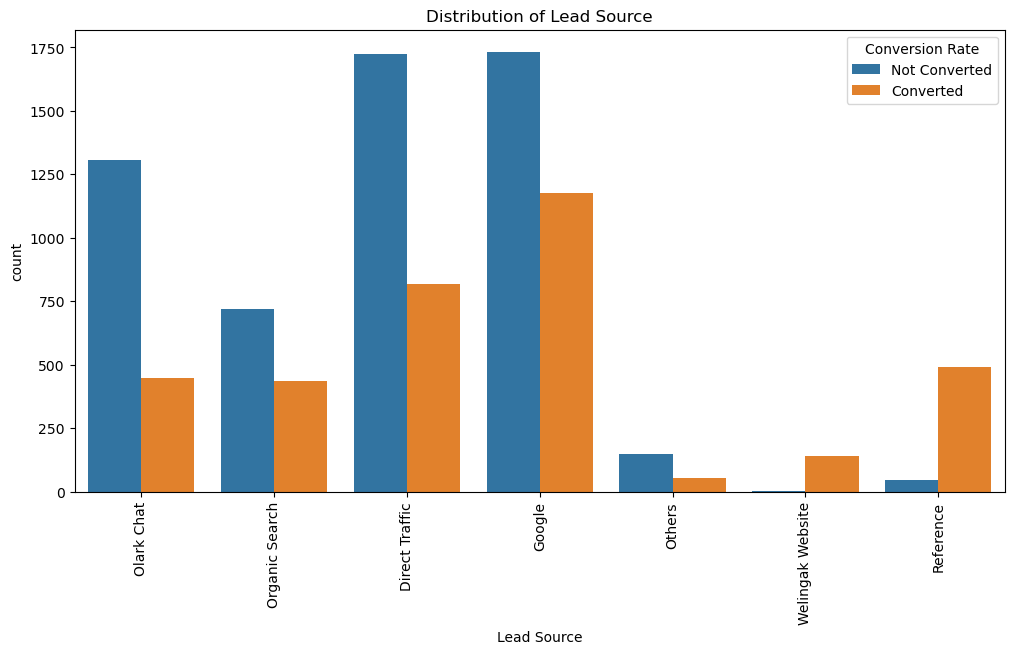

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Lead Source",hue="Converted")
plt.title("Distribution of Lead Source")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# Google and Direct Traffic generates maximum leads
# Google has the high conversion rate followed by Direct Traffic, Reference, Olark Chat.

In [ ]:
lead_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

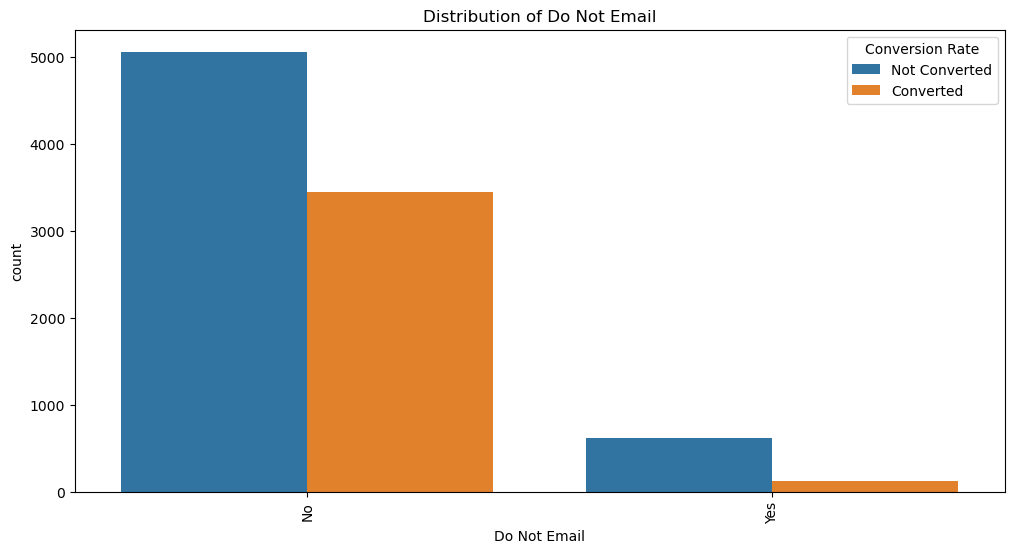

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Do Not Email",hue="Converted")
plt.title("Distribution of Do Not Email")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who option for mail option has maximum number of leads
# People who option for mail option has high conversion rate.

In [ ]:
lead_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

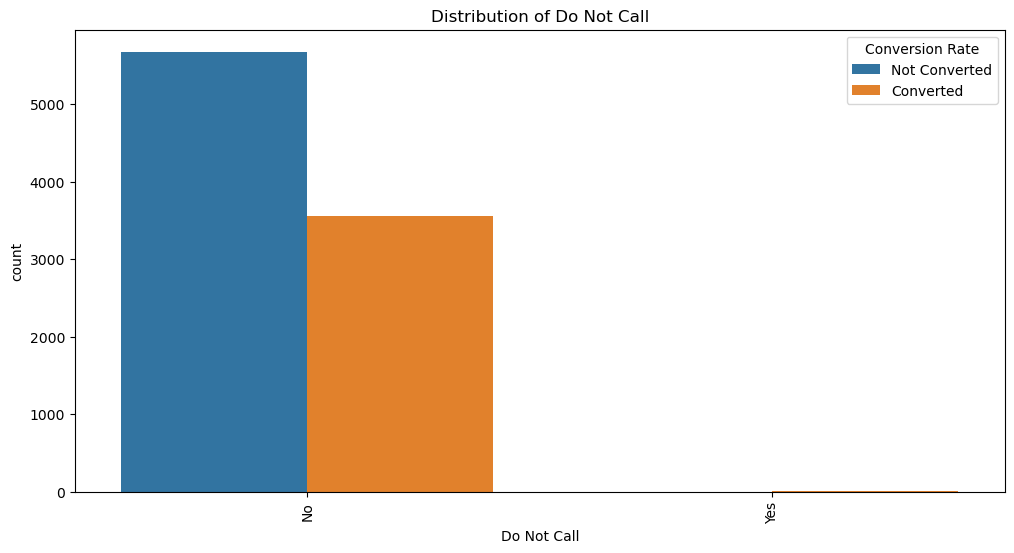

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Do Not Call",hue="Converted")
plt.title("Distribution of Do Not Call")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who option for call option are maximum in number.
# People who option for call option has high conversion rate.

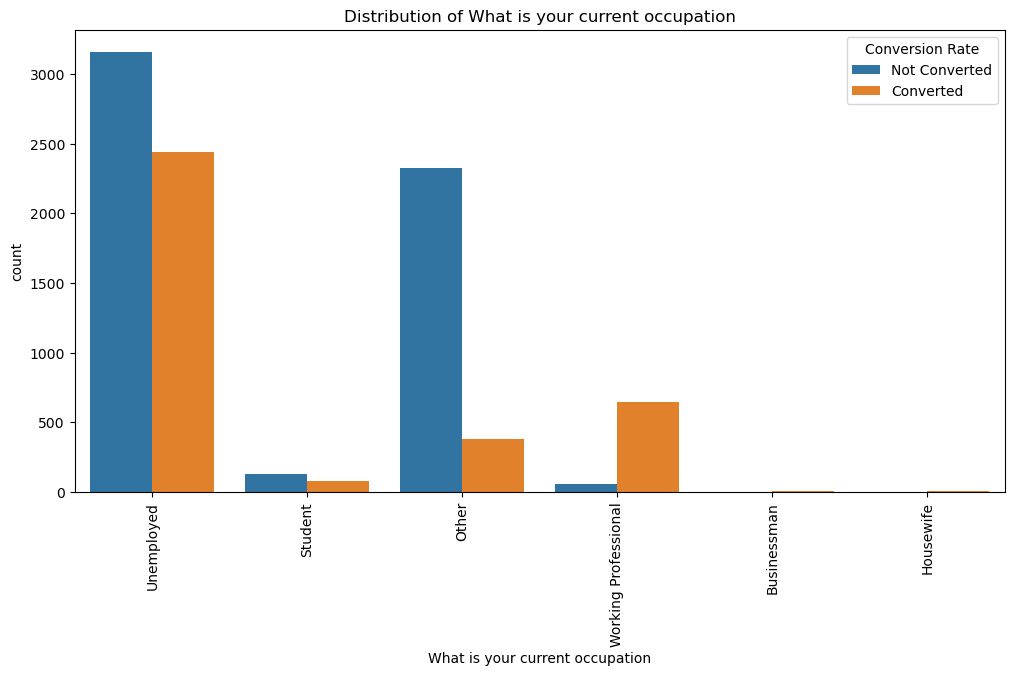

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="What is your current occupation",hue="Converted")
plt.title("Distribution of What is your current occupation")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# The people who are umemployed are maximum in number followed by Other
# Umemployed people has high conversion rate followed by working prodessional, Other

In [ ]:
lead_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

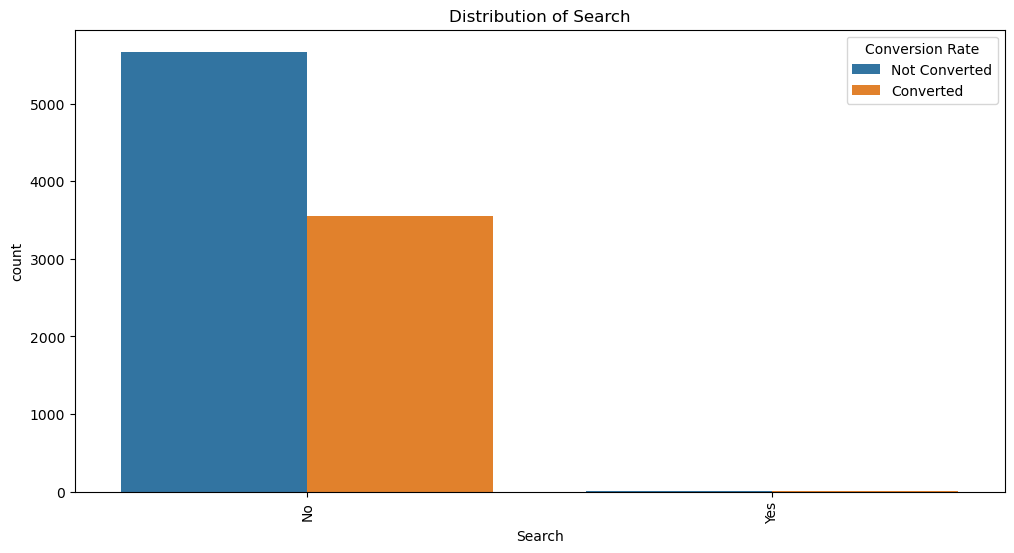

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Search",hue="Converted")
plt.title("Distribution of Search")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not search are maximum in number.
# People who did not search has high conversion rate.

In [ ]:
lead_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

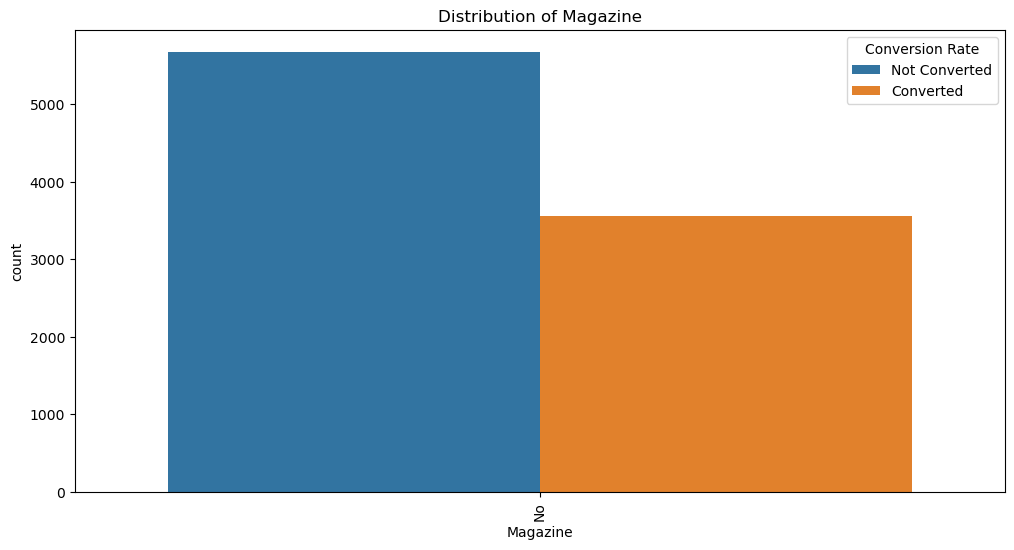

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Magazine",hue="Converted")
plt.title("Distribution of Magazine")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not checked the ad in magazine are maximum in number.

In [ ]:
lead_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

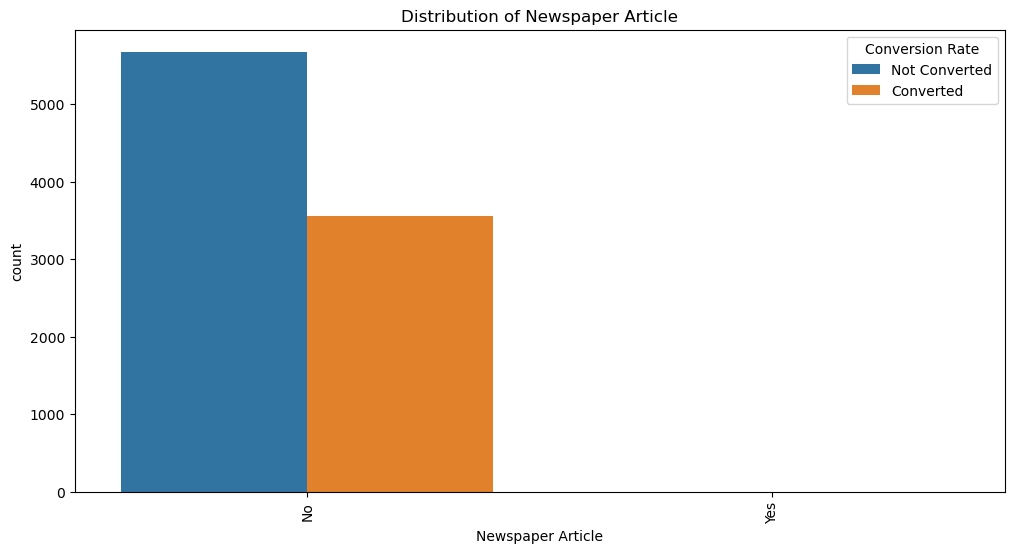

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Newspaper Article",hue="Converted")
plt.title("Distribution of Newspaper Article")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not checked the ad in newspaper article are maximum in number.
# People who did not checked the ad in newspaper article has high conversion rate.

In [ ]:
lead_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

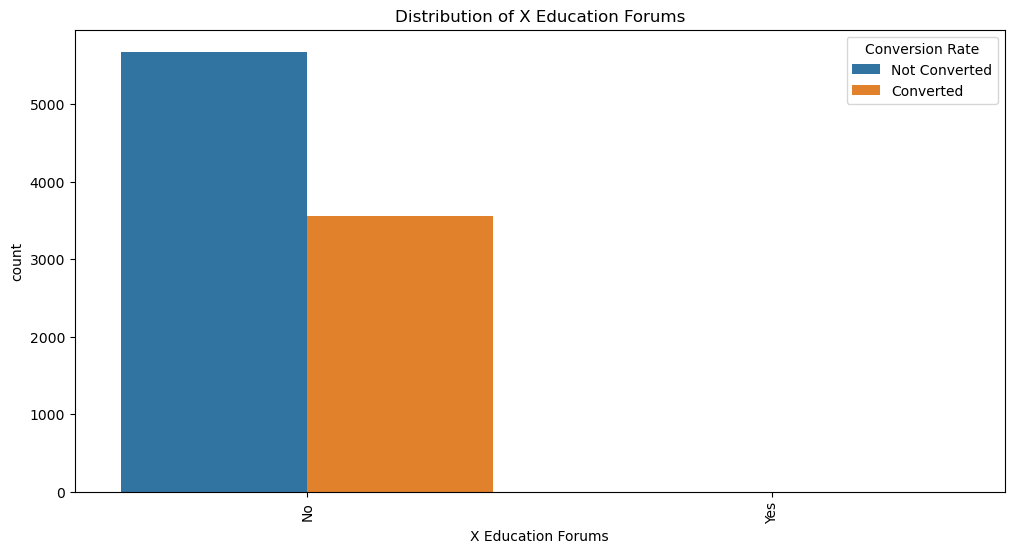

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="X Education Forums",hue="Converted")
plt.title("Distribution of X Education Forums")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not enrolled from X Education Forums are maximum in number.
# People who did not enrolled from X Education Forums has high conversion rate.

In [ ]:
lead_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

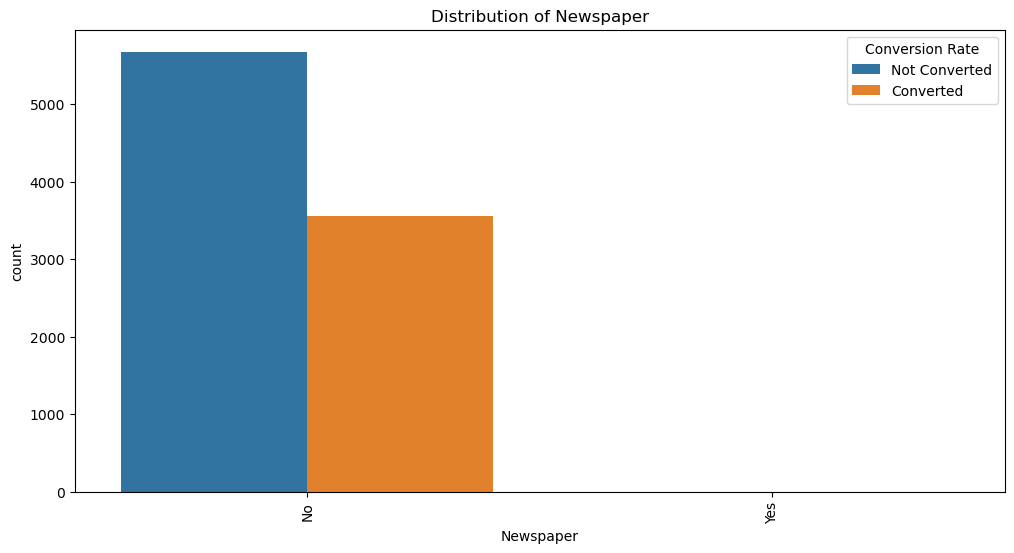

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Newspaper",hue="Converted")
plt.title("Distribution of Newspaper")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not checked in ad in Newspaper are maximum in number.
# People who did not checked in ad in Newspaper has high conversion rate.

In [ ]:
lead_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

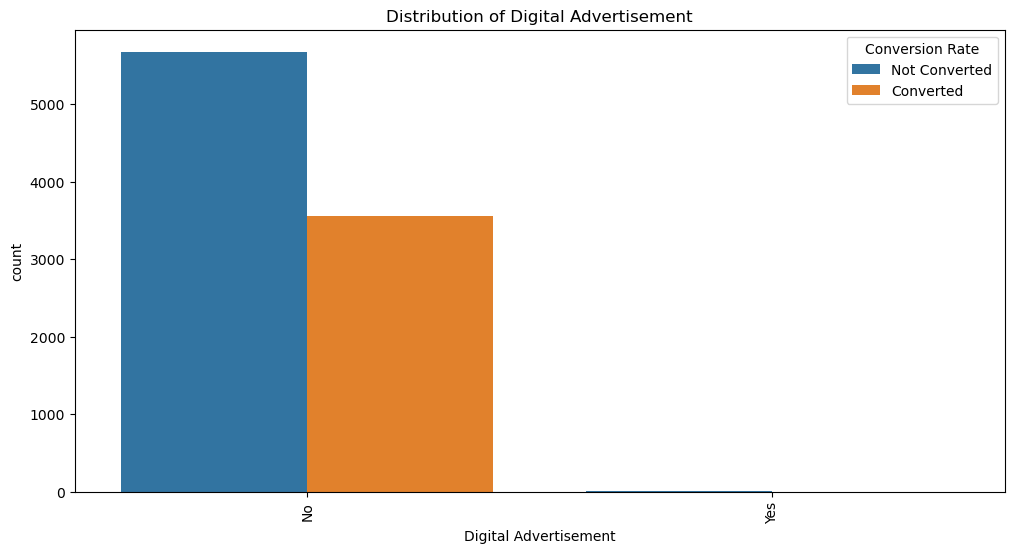

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Digital Advertisement",hue="Converted")
plt.title("Distribution of Digital Advertisement")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not enrolled by Digital Adverstiment are maximum in number.
# People who did not enrolled by Digital Adverstiment has high conversion rate.

In [ ]:
lead_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

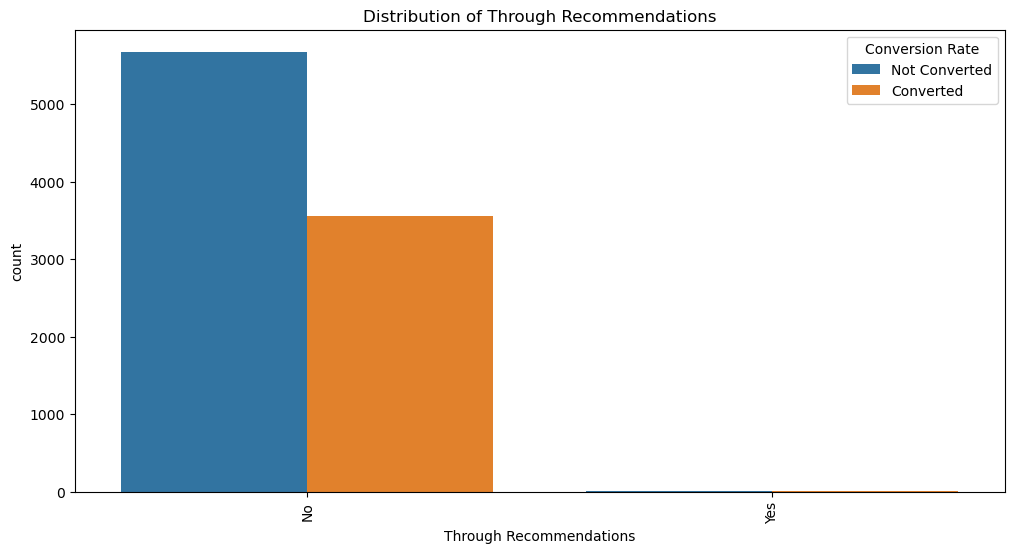

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Through Recommendations",hue="Converted")
plt.title("Distribution of Through Recommendations")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not enrolled Through Recommendations are maximum in number.
# People who did not enrolled Through Recommendations has high conversion rate.

In [ ]:
lead_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

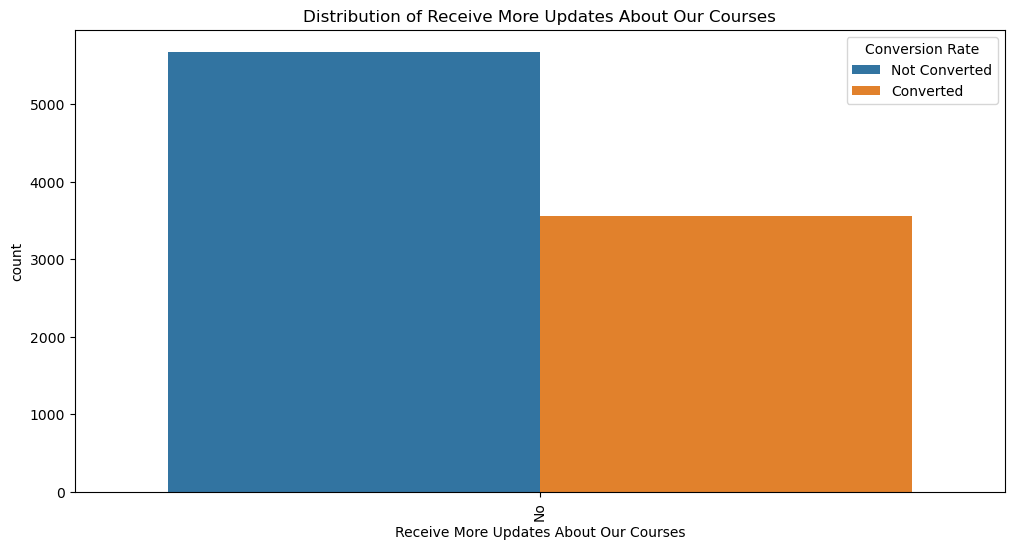

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Receive More Updates About Our Courses",hue="Converted")
plt.title("Distribution of Receive More Updates About Our Courses")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not opted for Receive More Updates About Our Courses are maximum in number.

In [ ]:
lead_df['Tags'].value_counts()

Will revert after reading the email    5425
Ringing                                1203
Others                                 1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

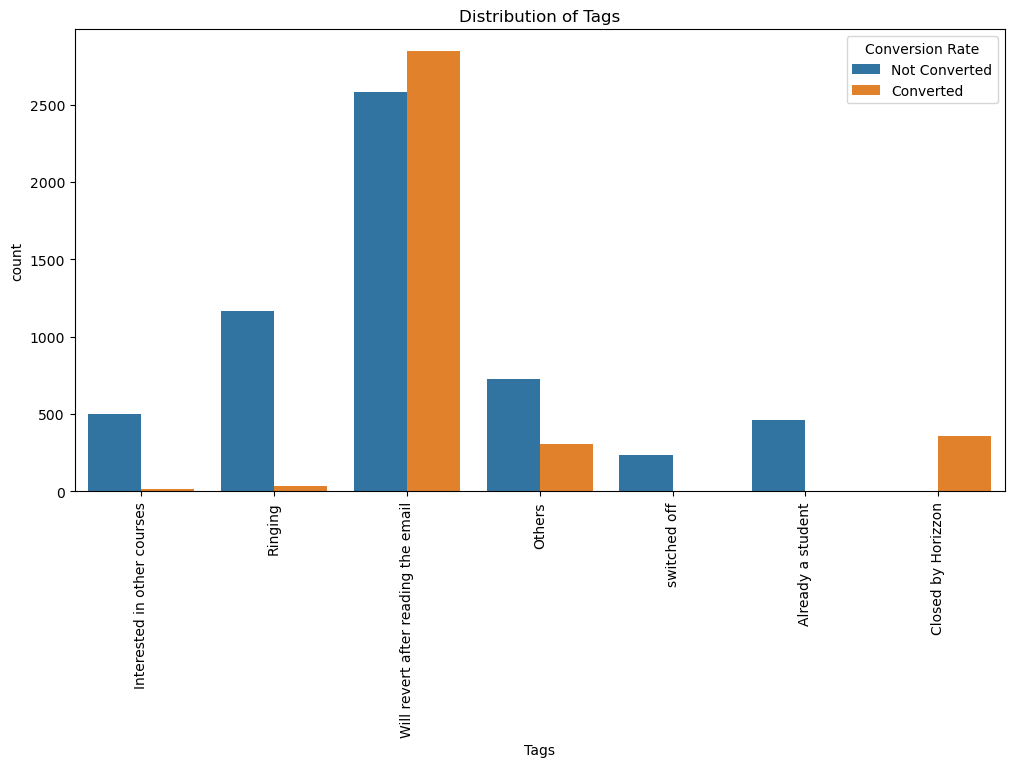

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Tags",hue="Converted")
plt.title("Distribution of Tags")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# The tags that Will revert after reading the email are more in number followed by Ringing
# The tags that Will revert after reading the email has high conversion rate followed by Others, Closed by Horizon

In [ ]:
lead_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

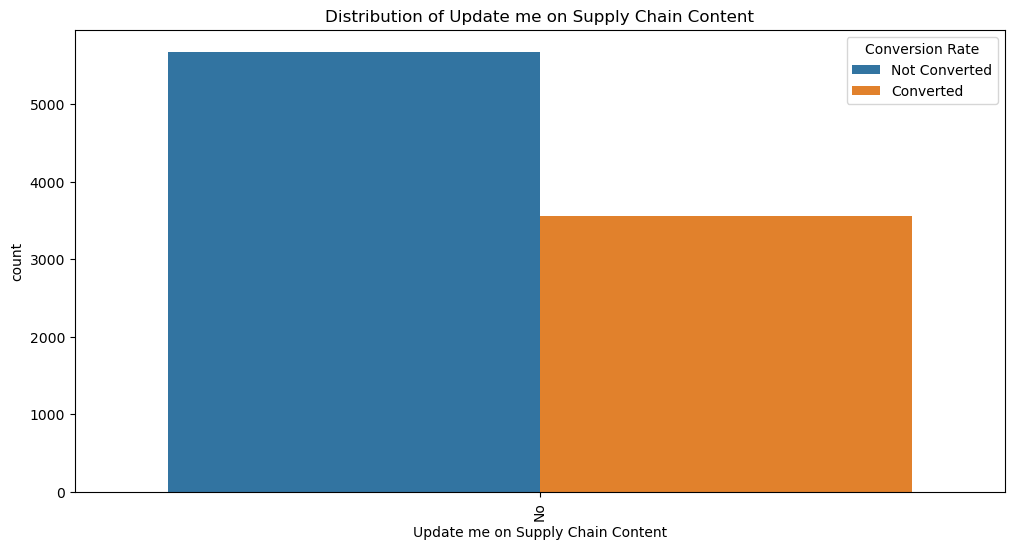

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Update me on Supply Chain Content",hue="Converted")
plt.title("Distribution of Update me on Supply Chain Content")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not opted for Update me on Supply Chain Content are maximum in number.

In [ ]:
lead_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

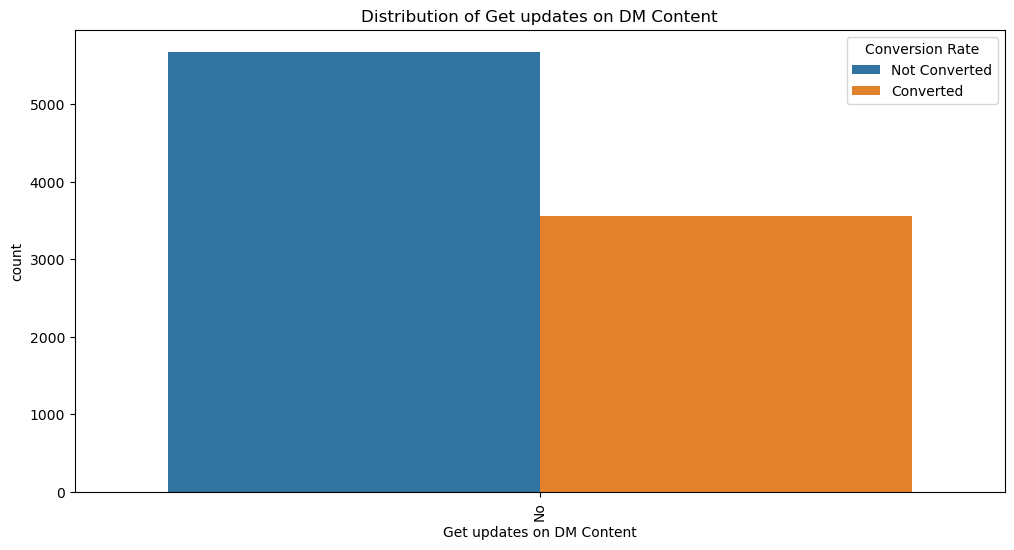

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Get updates on DM Content",hue="Converted")
plt.title("Distribution of Get updates on DM Content")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not opted for Get updates on DM Content are maximum in number.

In [ ]:
lead_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

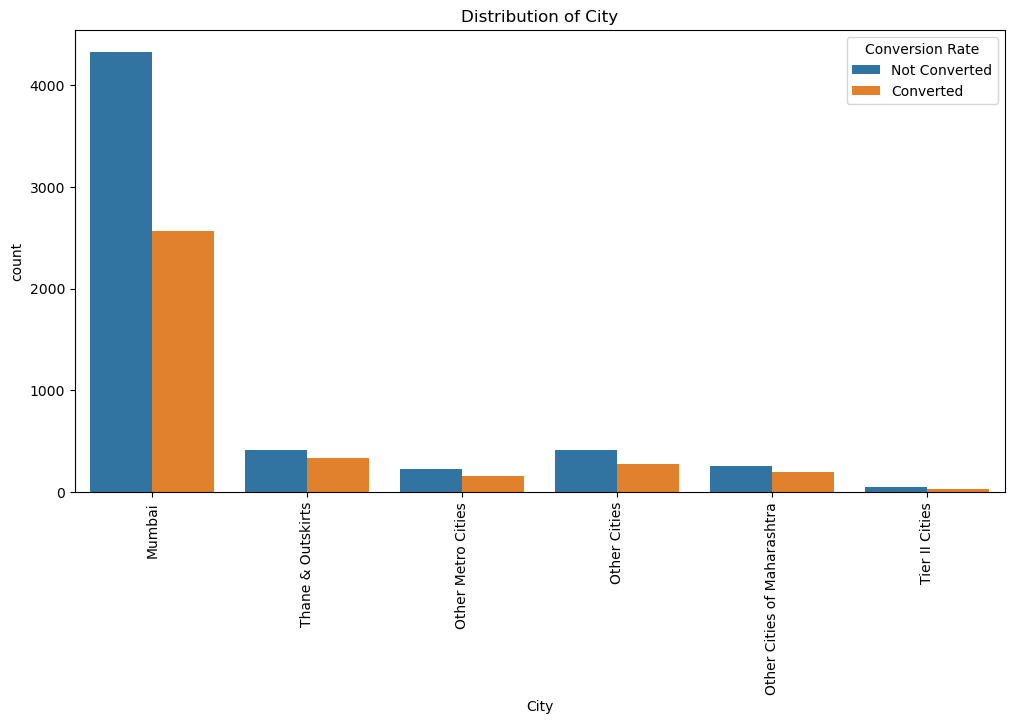

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="City",hue="Converted")
plt.title("Distribution of City")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# The people belong to Mumbai are more in number followed by Other cities, Thane&Outskirits
# The people belong to Mumbai has high conversion rate followed by Thane&Outskirits, Other cities

In [ ]:
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

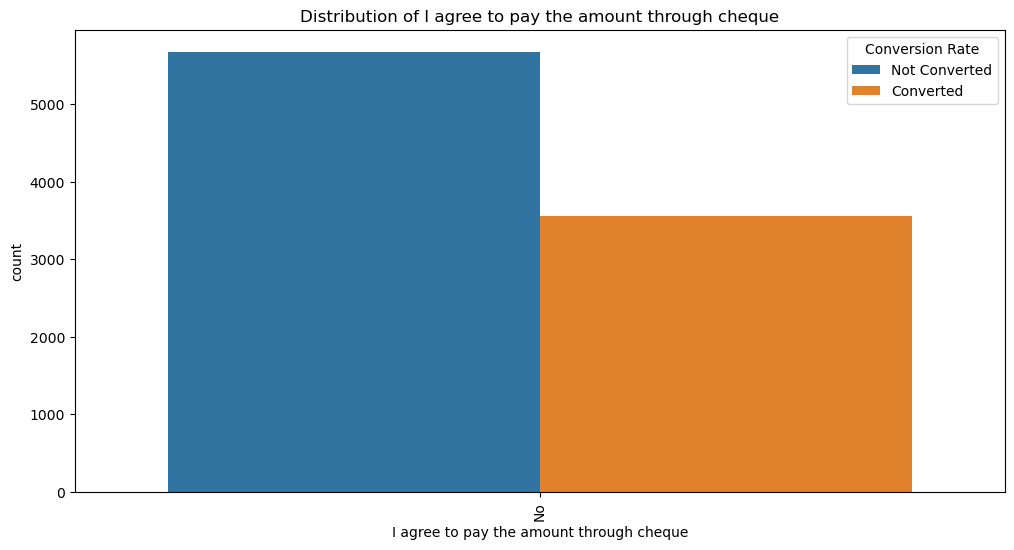

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="I agree to pay the amount through cheque",hue="Converted")
plt.title("Distribution of I agree to pay the amount through cheque")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not opted for I agree to pay the amount through cheque are maximum in number.

In [ ]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

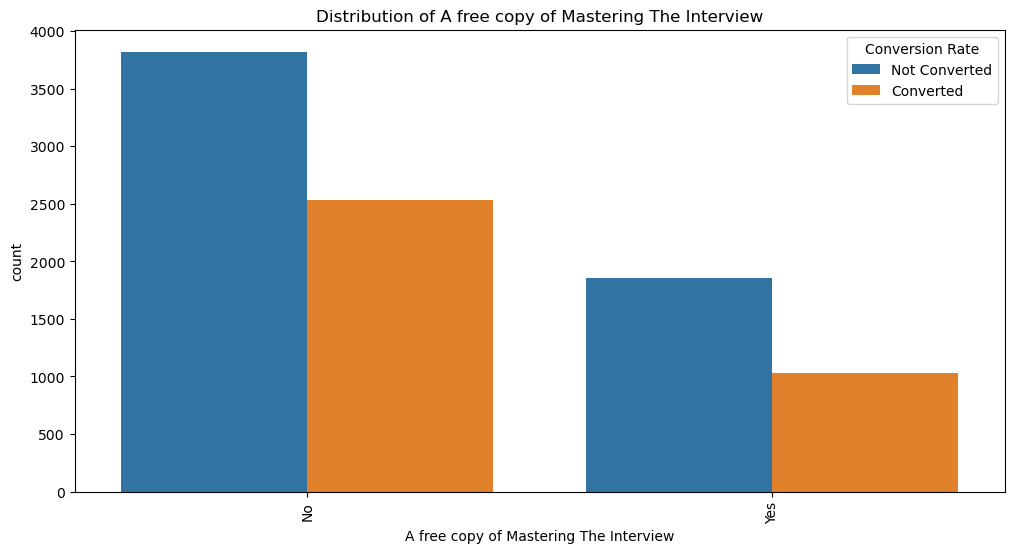

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="A free copy of Mastering The Interview",hue="Converted")
plt.title("Distribution of A free copy of Mastering The Interview")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# People who did not opted for A free copy of Mastering The Interview are maximum in number.
# People who did not opted for A free copy of Mastering The Interview has high conversion rate.

In [ ]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
lead_df['Last Notable Activity']=lead_df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')


In [ ]:
lead_df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

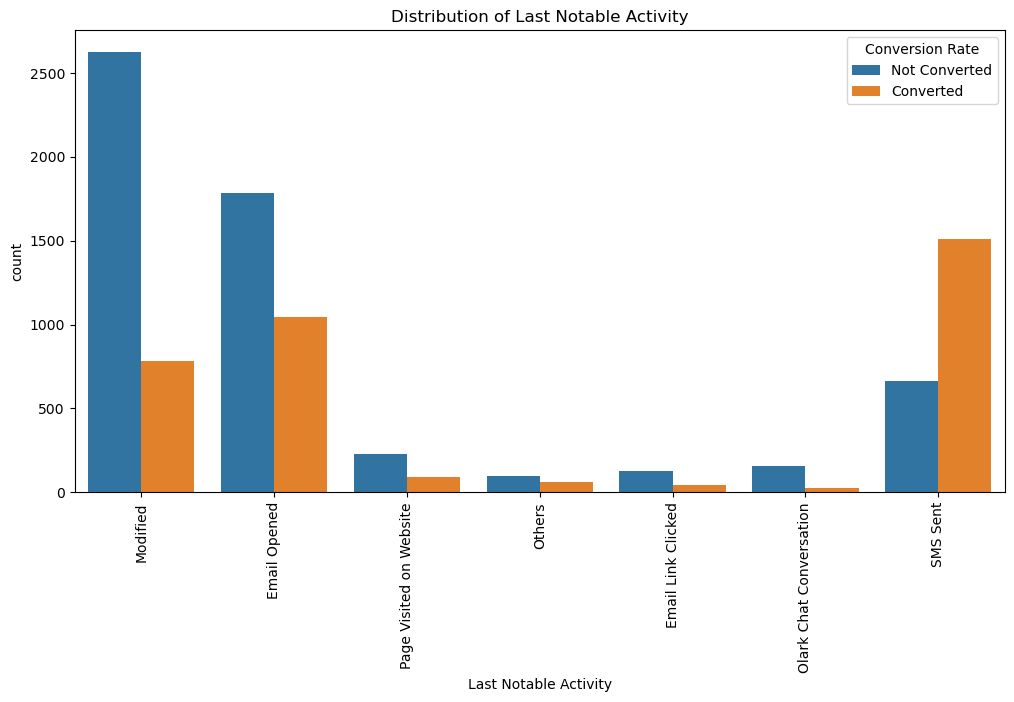

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(lead_df,x="Last Notable Activity",hue="Converted")
plt.title("Distribution of Last Notable Activity")
plt.xticks(rotation=90)
plt.legend(labels=['Not Converted', 'Converted'],title="Conversion Rate")
plt.show()

In [ ]:
# Modified as Last Notable Activity are maximum in number followed by Email Opened
# SMS sent has high conversion rate followed by Email Opened.

In [ ]:
## Dropping cols due to data imbalnce and containing unique values
cols_to_drop = ['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Do Not Call']

In [ ]:
lead_df.drop(cols_to_drop,axis=1, inplace=True)

In [ ]:
lead_df.shape

(9240, 14)

In [ ]:
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

In [ ]:
## Numerical Variable Analysis

In [ ]:
#### Univariate Analysis

In [ ]:
numerical_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

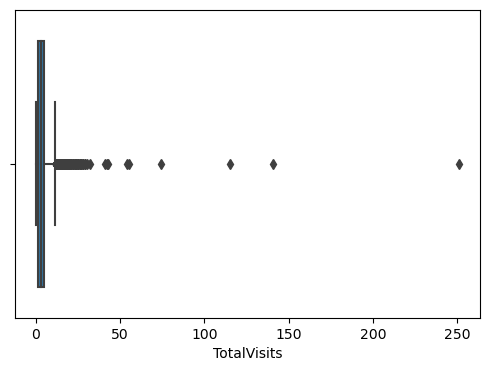

In [ ]:
## Visualizing TotaVisits data
plt.figure(figsize=(6,4))
sns.boxplot(lead_df,x='TotalVisits')
plt.show()

In [ ]:
## Imputting Upper range to reduced outliers present
Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]

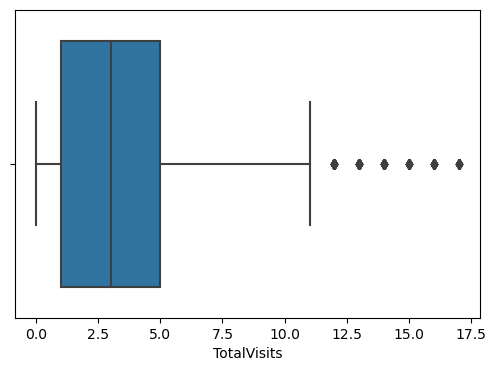

In [ ]:
## TotalVisits column are imputation
plt.figure(figsize=(6,4))
sns.boxplot(lead_df,x='TotalVisits')
plt.show()

In [ ]:
## Dataset after outlier treatment
lead_df.shape

(9157, 14)

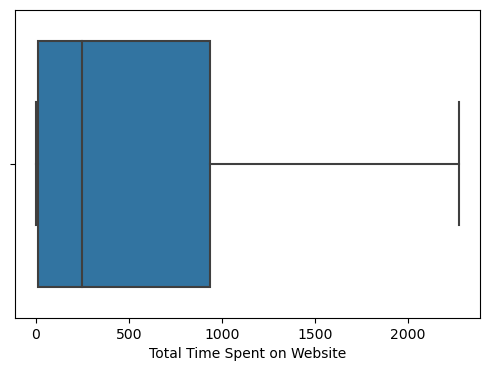

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(lead_df,x='Total Time Spent on Website')
plt.show()

In [ ]:
## No outlier present in the data

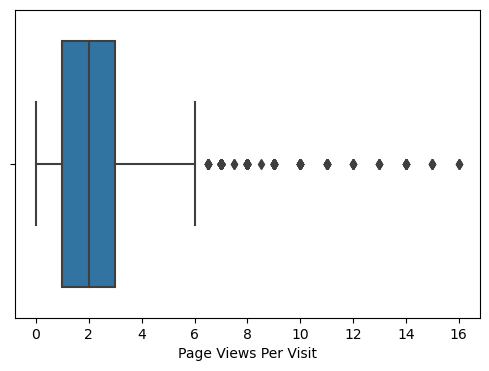

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(lead_df,x='Page Views Per Visit')
plt.show()

In [ ]:
## Imputting Upper range to reduced outliers present
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[(lead_df['Page Views Per Visit'] <= Q3)]

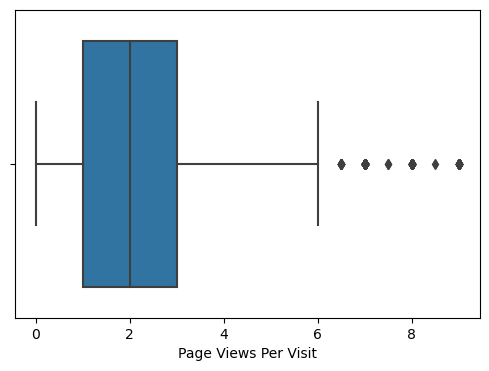

In [ ]:
## TotalVisits column after outlier tratment
plt.figure(figsize=(6,4))
sns.boxplot(lead_df,x='Page Views Per Visit')
plt.show()

In [ ]:
## Dataset after outlier treatment
lead_df.shape

(9090, 14)

### Bivariate Analysis

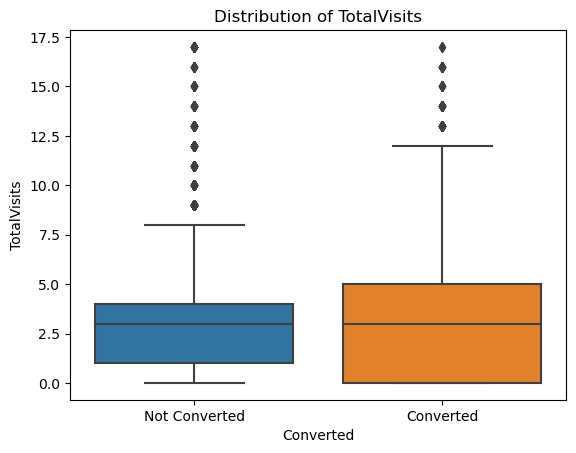

In [ ]:
#checking Spread of "Total Visits" vs Converted variable
fig, axes = plt.subplots()
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
axes.set_xticks([0, 1])
axes.set_xticklabels(['Not Converted', 'Converted'])
axes.set_title('Distribution of TotalVisits')
plt.show()

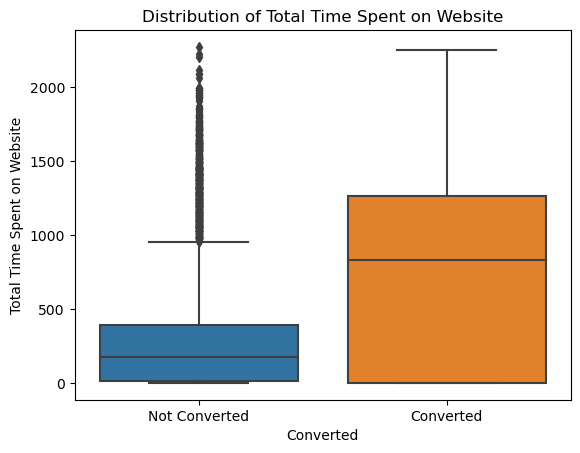

In [ ]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
fig, axes = plt.subplots()
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
axes.set_xticks([0, 1])
axes.set_xticklabels(['Not Converted', 'Converted'])
axes.set_title('Distribution of Total Time Spent on Website')
plt.show()

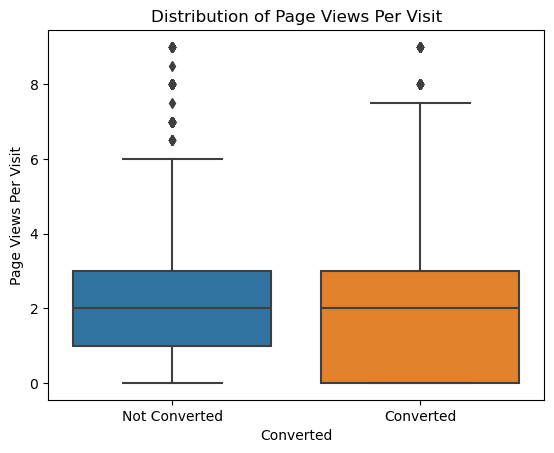

In [ ]:
#checking Spread of "Page Views Per Visit" vs Converted variable
fig, axes = plt.subplots()
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
axes.set_xticks([0, 1])
axes.set_xticklabels(['Not Converted', 'Converted'])
axes.set_title('Distribution of Page Views Per Visit')
plt.show()

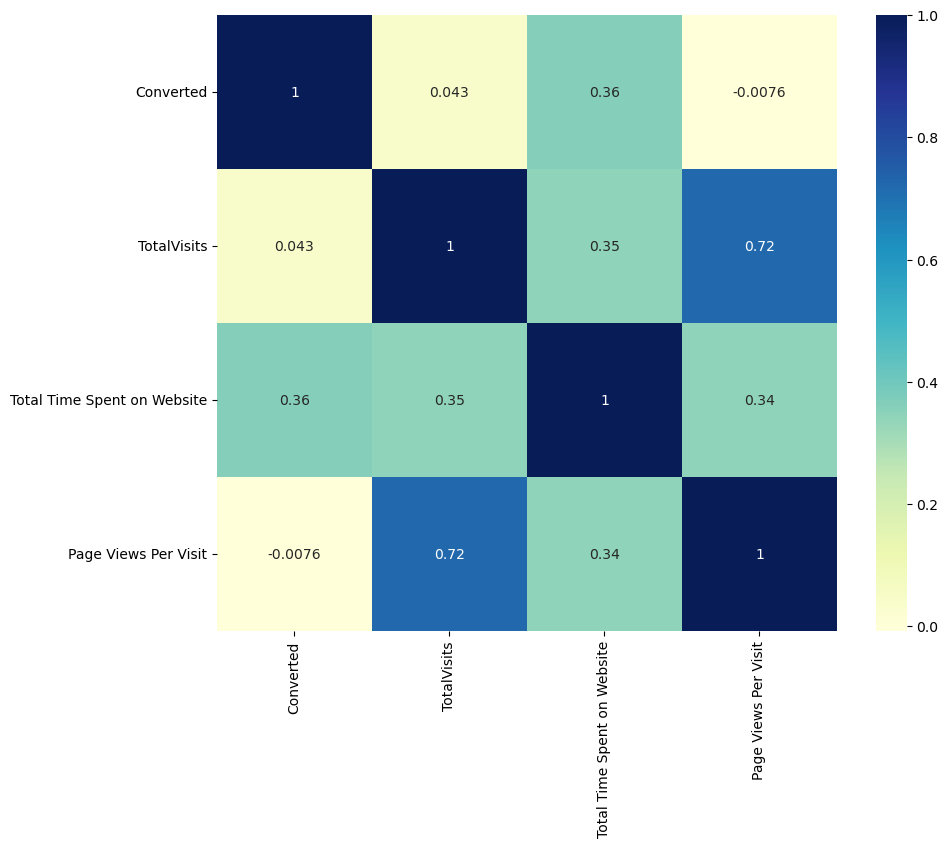

In [ ]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Pre Processing

In [ ]:
## Mapping the Do Not Email column to O and 1
lead_df["Do Not Email"]=lead_df["Do Not Email"].map({"No":0,"Yes":1})

In [ ]:
lead_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

In [ ]:
## Mapping the A free copy of Mastering The Interview column to O and 1
lead_df["A free copy of Mastering The Interview"]=lead_df["A free copy of Mastering The Interview"].map({"No":0,"Yes":1})

In [ ]:
lead_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                       0              Modified  
1  Mumbai                                       0          Email Opened  
2  Mumbai                                       1          Email Opened  
3  Mumbai                                       0              Modified  
4  Mumbai                                       0              Modified

## Dummy Variable creation

In [ ]:
## Dummies to be created for all categorical columns which are having more than 2 unique values
dum_cols=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Tags","City","Last Notable Activity"]

In [ ]:
dum=pd.get_dummies(lead_df[dum_cols],drop_first=True,dtype=int)
lead_df=pd.concat([lead_df,dum],axis=1)

In [ ]:
lead_df=lead_df.drop(dum_cols,axis=1)

In [ ]:
lead_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 64 columns]

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   int64  
 7   Lead Origin_Lead Add Form                             9090 non-null   int64  
 8   Lead Origin_Lead Import                               9090

In [ ]:
X=lead_df.drop("Converted",axis=1)
y=lead_df["Converted"]

In [ ]:
# Split the dataset into 70% and 30% for train and test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
## Checking the shape of the train and test data
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (6363, 63)
Test X shape: (2727, 63)
Train y shape: (6363,)
Test y shape: (2727,)


In [ ]:
# The head of the train data set
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
6246             0          2.0                          288   
8177             0          3.0                         1029   
6809             1          6.0                          137   
5792             0          0.0                            0   
4491             0          0.0                            0   

      Page Views Per Visit  A free copy of Mastering The Interview  \
6246                   2.0                                       0   
8177                   3.0                                       0   
6809                   6.0                                       0   
5792                   0.0                                       0   
4491                   0.0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6246                                    1                          0   
8177                                    1                          0   
6809                                    1                          0   
5792                                    0                          1   
4491                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
6246                        0                           0                   0   
8177                        0                           0                   1   
6809                        0                           0                   0   
5792                        0                           0                   0   
4491                        0                           0                   0   

      ...  City_Other Cities of Maharashtra  City_Other Metro Cities  \
6246  ...                                 0                        0   
8177  ...                                 0                        0   
6809  ...                                 0                        0   
5792  ...                                 0                        0   
4491  ...                                 0                        0   

      City_Thane & Outskirts  City_Tier II Cities  \
6246                       0                    0   
8177                       0                    0   
6809                       1                    0   
5792                       0                    0   
4491                       0                    0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
6246                                   0                               0   
8177                                   0                               0   
6809                                   0                               1   
5792                                   0                               0   
4491                                   0                               0   

      Last Notable Activity_Olark Chat Conversation  \
6246                                              0   
8177                                              0   
6809                                              0   
5792                                              0   
4491                                              0   

      Last Notable Activity_Others  \
6246                             0   
8177                             0   
6809                             0   
5792                             0   
4491                             0   

      Last Notable Activity_Page Visited on Website  \
6246                                              0   
8177                                              0   
6809                                              0   
5792                                              0   
4491                                              0   

      Last Notable Activity_SMS Sent  
6246                               1  
8177                               1  
6809                               0  
5792                    

In [ ]:
## The numerical info of the train data set
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   6363.000000  6363.000000                  6363.000000   
mean       0.074336     3.131385                   487.021216   
std        0.262338     2.893319                   550.228952   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                     7.000000   
50%        0.000000     3.000000                   247.000000   
75%        0.000000     4.000000                   931.000000   
max        1.000000    17.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6363.000000                             6363.000000   
mean               2.255244                                0.308817   
std                1.872357                                0.462042   
min                0.000000                                0.000000   
25%                1.000000                                0.000000   
50%                2.000000                                0.000000   
75%                3.000000                                1.000000   
max                9.000000                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6363.000000                6363.000000   
mean                              0.526324                   0.081094   
std                               0.499346                   0.273001   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              6363.000000                 6363.000000   
mean                  0.006286                    0.000157   
std                   0.079043                    0.012536   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Google  ...  City_Other Cities of Maharashtra  \
count         6363.000000  ...                       6363.000000   
mean             0.310388  ...                          0.050448   
std              0.462689  ...                          0.218885   
min              0.000000  ...                          0.000000   
25%              0.000000  ...                          0.000000   
50%              0.000000  ...                          0.000000   
75%              1.000000  ...                          0.000000   
max              1.000000  ...                          1.000000   

       City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
count              6363.000000             6363.000000          6363.000000   
mean                  0.040390                0.079208             0.007544   
std                   0.196887                0.270084             0.086533   
min                   0.000000                0.000000             0.000000   
25%                   0.000000                0.000000             0.000000   
50%                   0.000000                0.000000             0.000000   
75%                   0.000000                0.000000             0.000000   
max                   1.000000                1.000000             1.000000   

       Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
count                         6363.000000                     6363.000000   
mean                             0.305673                        0.371680   
std     

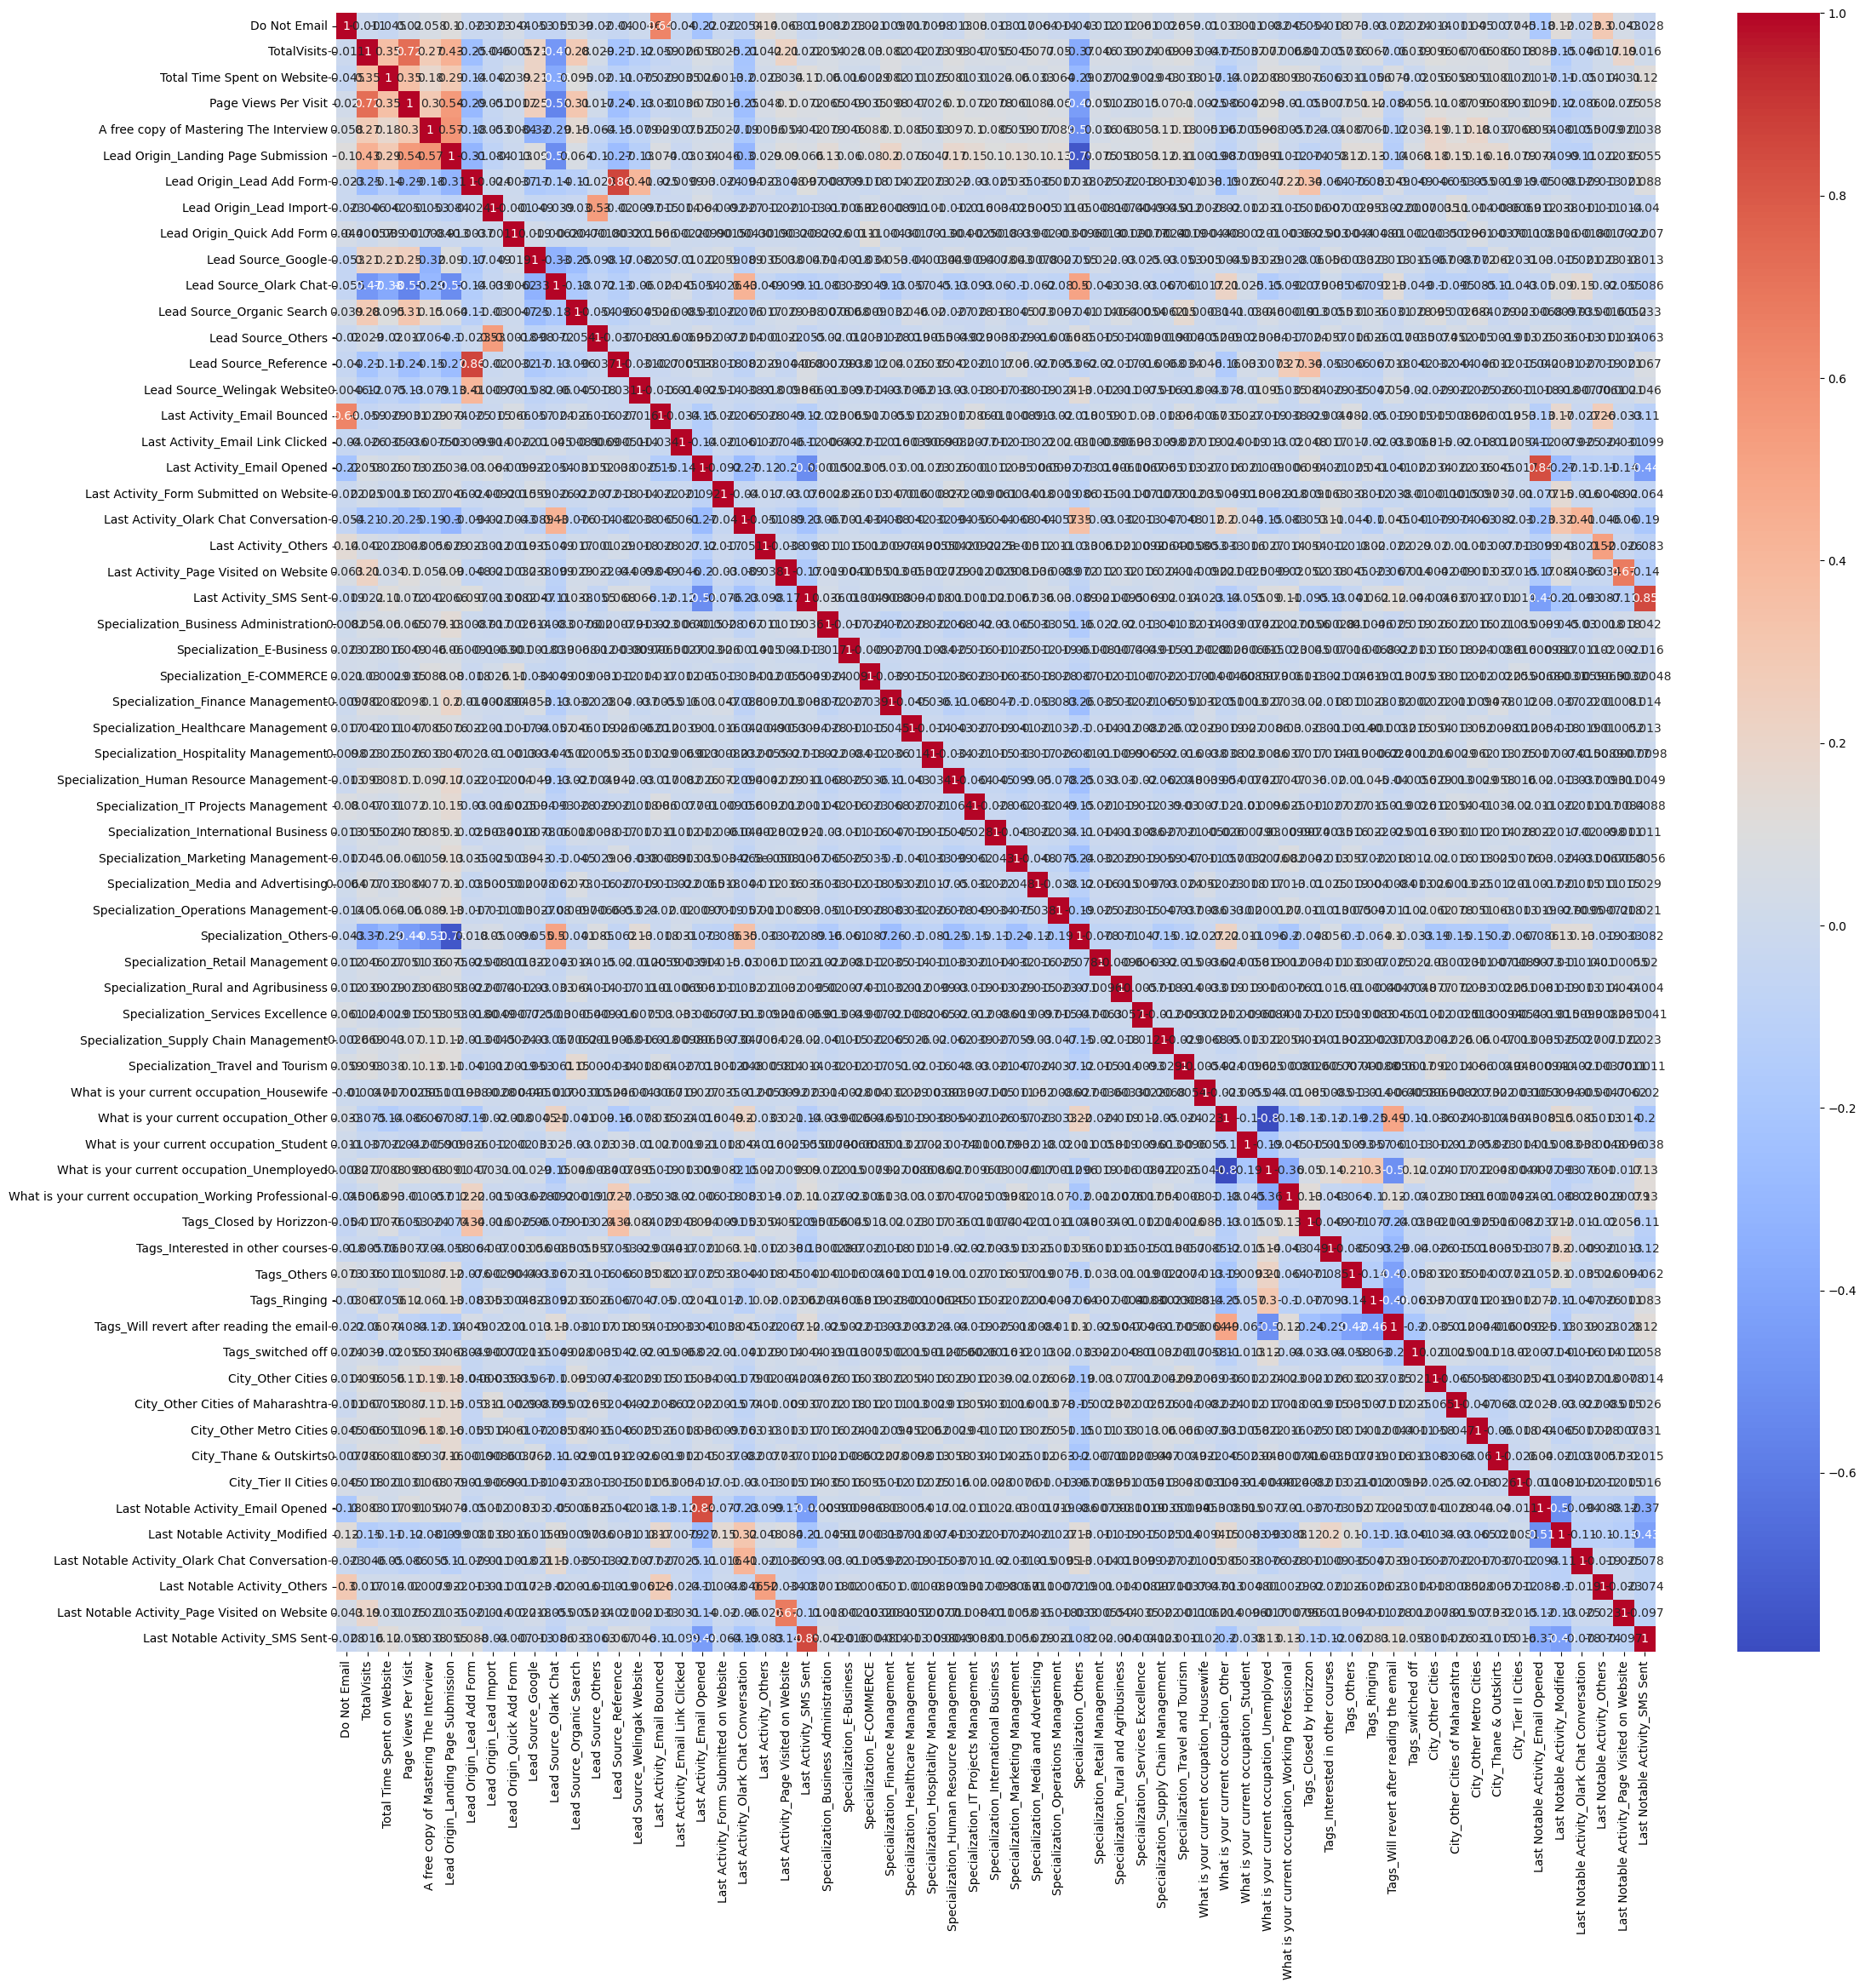

In [ ]:
# Correlation of the train data set
plt.figure(figsize = (25, 25))
sns.heatmap(X_train.corr(), annot = True, cmap="coolwarm")
plt.show()

## Rescaling the features

In [ ]:
# importing the required library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## Using the MinMaxScaler for rescaling fetaures
scaler=MinMaxScaler()

In [ ]:
# Apply scaler() to scale the train data set and test data set
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

## Feature Selection

In [ ]:
## Feature selection using RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Running RFE with 15 variables as output
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [ ]:
# Features that have been selected by RFE
selector.support_

array([ True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False,  True])

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col=X_train_scaled.columns[selector.support_]

In [ ]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [ ]:
# Selecting columns selected by RFE
X_train=X_train_scaled[col]
X_test=X_test_scaled[col]

In [ ]:
X_train.head()

Do Not Email  Total Time Spent on Website  Page Views Per Visit  \
0           0.0                     0.126761              0.222222   
1           0.0                     0.452905              0.333333   
2           1.0                     0.060299              0.666667   
3           0.0                     0.000000              0.000000   
4           0.0                     0.000000              0.000000   

   Lead Origin_Lead Add Form  Last Activity_Email Bounced  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          0.0   
4                        0.0                          0.0   

   Last Activity_Olark Chat Conversation  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   What is your current occupation_Other  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    1.0   

   What is your current occupation_Working Professional  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Tags_Closed by Horizzon  Tags_Others  Tags_Ringing  \
0                      0.0          0.0           1.0   
1                      0.0          0.0           0.0   
2                      0.0          0.0           0.0   
3                      0.0          0.0           0.0   
4                      0.0          0.0           0.0   

   Tags_Will revert after reading the email  Tags_switched off  \
0                                       0.0                0.0   
1                                       1.0                0.0   
2                                       0.0                0.0   
3                                       1.0                0.0   
4                                       1.0                0.0   

   Last Notable Activity_Others  Last Notable Activity_SMS Sent  
0                           0.0                             1.0  
1                           0.0                             1.0  
2                           0.0                             0.0  
3                           0.0                             1.0  
4                           0.0                             1.0

In [ ]:
X_test.head()

Do Not Email  Total Time Spent on Website  Page Views Per Visit  \
0           0.0                     0.000000              0.000000   
1           0.0                     0.090229              0.111111   
2           0.0                     0.553257              0.222222   
3           0.0                     0.087148              0.222222   
4           0.0                     0.082306              0.222222   

   Lead Origin_Lead Add Form  Last Activity_Email Bounced  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

   Last Activity_Olark Chat Conversation  \
0                                    1.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   What is your current occupation_Other  \
0                                    1.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   What is your current occupation_Working Professional  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Tags_Closed by Horizzon  Tags_Others  Tags_Ringing  \
0                      0.0          0.0           0.0   
1                      0.0          0.0           1.0   
2                      0.0          0.0           0.0   
3                      0.0          0.0           1.0   
4                      0.0          0.0           1.0   

   Tags_Will revert after reading the email  Tags_switched off  \
0                                       1.0                0.0   
1                                       0.0                0.0   
2                                       1.0                0.0   
3                                       0.0                0.0   
4                                       0.0                0.0   

   Last Notable Activity_Others  Last Notable Activity_SMS Sent  
0                           0.0                             0.0  
1                           0.0                             0.0  
2                           0.0                             1.0  
3                           0.0                             1.0  
4                           0.0                             0.0

## Modelling

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

### First Model

In [ ]:
# First Model
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1511.5
Date:                Mon, 20 May 2024   Deviance:                       3023.0
Time:                        18:22:48   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5757
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8008      0.345    -13.932      0.000      -5.476      -4.125
Do Not Email                                            -1.5216      0.258     -5.894      0.000      -2.028      -1.016
Total Time Spent on Website                              4.0821      0.214     19.078      0.000       3.663       4.501
Page Views Per Visit                                    -1.4198      0.259     -5.488      0.000      -1.927      -0.913
Lead Origin_Lead Add Form                                1.5980      0.245      6.513      0.000       1.117       2.079
Last Activity_Email Bounced                             -1.4437      0.426     -3.391      0.001      -2.278      -0.609
Last Activity_Olark Chat Conversation                   -1.4667      0.206     -7.104      0.000      -1.871      -1.062
What is your current occupation_Other                   -3.1275      0.118    -26.613      0.000      -3.358      -2.897
What is your current occupation_Working Professional     1.2672      0.254      4.993      0.000       0.770       1.765
Tags_Closed by Horizzon                                  9.0149      1.064      8.469      0.000       6.929      11.101
Tags_Others                                              3.0873      0.349      8.834      0.000       2.402       3.772
Tags_Ringing                                            -0.6908      0.412     -1.676      0.094      -1.499       0.117
Tags_Will revert after reading the email                 5.4337      0.345     15.758      0.000       4.758       6.110
Tags_switched off                                       -0.7416      0.626     -1.184      0.236      -1.969       0.486
Last Notable Activity_Others                             1.3900      0.368      3.781      0.000       0.669       2.111
Last Notable Activity_SMS Sent                           2.0782      0.123     16.898      0.000       1.837       2.319
========================================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                                               const  12.434087
1                                        Do Not Email   1.768378
2                         Total Time Spent on Website   1.293423
3                                Page Views Per Visit   1.327126
4                           Lead Origin_Lead Add Form   1.447579
5                         Last Activity_Email Bounced   1.747563
6               Last Activity_Olark Chat Conversation   1.198696
7               What is your current occupation_Other   1.745951
8   What is your current occupation_Working Profes...   1.149094
9                             Tags_Closed by Horizzon   1.575511
10                                        Tags_Others   1.877730
11                                       Tags_Ringing   2.056710
12           Tags_Will revert after reading the email   3.602245
13                                  Tags_switched off   1.251174
14                       Last Notable Activity_Others   1.121844
15                     Last Notable Activity_SMS Sent   1.223926

In [ ]:
## Dropping the Tags_switched off as it have high p-value (p-values must be < 0.05)
X_train_sm=X_train_sm.drop(["Tags_switched off"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_switched off"],axis=1)

### Second Model

In [ ]:
# Second Model
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1512.3
Date:                Mon, 20 May 2024   Deviance:                       3024.5
Time:                        18:22:48   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0559      0.300    -16.874      0.000      -5.643      -4.469
Do Not Email                                            -1.5204      0.258     -5.901      0.000      -2.025      -1.015
Total Time Spent on Website                              4.0830      0.214     19.083      0.000       3.664       4.502
Page Views Per Visit                                    -1.4254      0.258     -5.515      0.000      -1.932      -0.919
Lead Origin_Lead Add Form                                1.5997      0.246      6.508      0.000       1.118       2.081
Last Activity_Email Bounced                             -1.4470      0.426     -3.400      0.001      -2.281      -0.613
Last Activity_Olark Chat Conversation                   -1.4669      0.207     -7.098      0.000      -1.872      -1.062
What is your current occupation_Other                   -3.1248      0.117    -26.621      0.000      -3.355      -2.895
What is your current occupation_Working Professional     1.2779      0.255      5.012      0.000       0.778       1.778
Tags_Closed by Horizzon                                  9.2699      1.051      8.822      0.000       7.210      11.329
Tags_Others                                              3.3474      0.302     11.095      0.000       2.756       3.939
Tags_Ringing                                            -0.4202      0.366     -1.147      0.251      -1.138       0.298
Tags_Will revert after reading the email                 5.6919      0.298     19.128      0.000       5.109       6.275
Last Notable Activity_Others                             1.3879      0.368      3.774      0.000       0.667       2.109
Last Notable Activity_SMS Sent                           2.0589      0.121     16.952      0.000       1.821       2.297
========================================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                                               const  10.588061
1                                        Do Not Email   1.766997
2                         Total Time Spent on Website   1.293308
3                                Page Views Per Visit   1.324893
4                           Lead Origin_Lead Add Form   1.447576
5                         Last Activity_Email Bounced   1.745785
6               Last Activity_Olark Chat Conversation   1.193180
7               What is your current occupation_Other   1.744251
8   What is your current occupation_Working Profes...   1.148708
9                             Tags_Closed by Horizzon   1.506082
10                                        Tags_Others   1.669696
11                                       Tags_Ringing   1.796349
12           Tags_Will revert after reading the email   3.058078
13                       Last Notable Activity_Others   1.121844
14                     Last Notable Activity_SMS Sent   1.206336

In [ ]:
## Dropping the Tags_Ringing as it have high p-value (p-values must be < 0.05)
X_train_sm=X_train_sm.drop(["Tags_Ringing"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_Ringing"],axis=1)

### Third Model

In [ ]:
# Third Model
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1512.9
Date:                Mon, 20 May 2024   Deviance:                       3025.8
Time:                        18:22:49   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3135      0.216    -24.605      0.000      -5.737      -4.890
Do Not Email                                            -1.5147      0.257     -5.883      0.000      -2.019      -1.010
Total Time Spent on Website                              4.0821      0.214     19.079      0.000       3.663       4.502
Page Views Per Visit                                    -1.4315      0.258     -5.543      0.000      -1.938      -0.925
Lead Origin_Lead Add Form                                1.5877      0.244      6.497      0.000       1.109       2.067
Last Activity_Email Bounced                             -1.4515      0.425     -3.413      0.001      -2.285      -0.618
Last Activity_Olark Chat Conversation                   -1.4682      0.207     -7.099      0.000      -1.874      -1.063
What is your current occupation_Other                   -3.1235      0.117    -26.633      0.000      -3.353      -2.894
What is your current occupation_Working Professional     1.2867      0.256      5.023      0.000       0.785       1.789
Tags_Closed by Horizzon                                  9.5313      1.029      9.261      0.000       7.514      11.548
Tags_Others                                              3.6102      0.213     16.920      0.000       3.192       4.028
Tags_Will revert after reading the email                 5.9538      0.208     28.562      0.000       5.545       6.362
Last Notable Activity_Others                             1.3836      0.368      3.763      0.000       0.663       2.104
Last Notable Activity_SMS Sent                           2.0428      0.120     16.959      0.000       1.807       2.279
========================================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                                               const  7.068151
1                                        Do Not Email  1.765560
2                         Total Time Spent on Website  1.293005
3                                Page Views Per Visit  1.320287
4                           Lead Origin_Lead Add Form  1.446845
5                         Last Activity_Email Bounced  1.745399
6               Last Activity_Olark Chat Conversation  1.180474
7               What is your current occupation_Other  1.741323
8   What is your current occupation_Working Profes...  1.147469
9                             Tags_Closed by Horizzon  1.366661
10                                        Tags_Others  1.288367
11           Tags_Will revert after reading the email  2.060842
12                       Last Notable Activity_Others  1.121508
13                     Last Notable Activity_SMS Sent  1.186108

In [ ]:
# Calculating predicted values of y_train

y_train_pred = result3.predict(X_train_sm)
y_train_pred[:10]

0    0.044306
1    0.982957
2    0.000533
3    0.996156
4    0.391667
5    0.077052
6    0.016438
7    0.006592
8    0.005900
9    0.996156
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.43056951e-02, 9.82956631e-01, 5.33072905e-04, 9.96156399e-01,
       3.91666801e-01, 7.70521602e-02, 1.64383777e-02, 6.59200374e-03,
       5.90033022e-03, 9.96156399e-01])

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.044306         6246
1          1        0.982957         8177
2          0        0.000533         6809
3          1        0.996156         5792
4          0        0.391667         4491

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.044306         6246          0
1          1        0.982957         8177          1
2          0        0.000533         6809          0
3          1        0.996156         5792          1
4          0        0.391667         4491          0

In [ ]:
## Importing the library
from sklearn import metrics

In [ ]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3641,  275],
       [ 337, 2110]])

In [ ]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.9

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.86

In [ ]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.93

In [ ]:
# Calculate false postive rate - predicting converted when customer does have not converted -- 1-Specificity
print(round(FP/ float(TN+FP),2))

0.07


In [ ]:
# Positive predictive value
print (round(TP / float(TP+FP),2))

0.88


In [ ]:
# Negative predictive value
print (round(TN / float(TN+ FN),2))

0.92


## Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

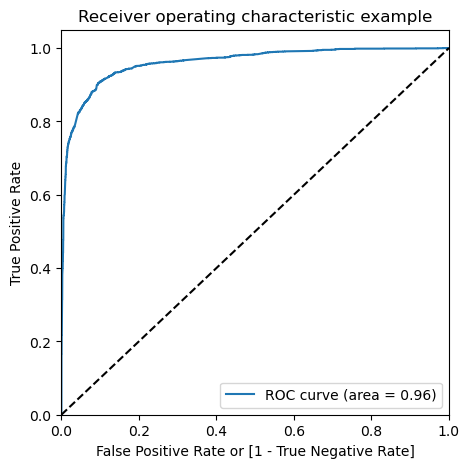

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [ ]:
## The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

## Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.044306         6246          0    1    0    0    0    0   
1          1        0.982957         8177          1    1    1    1    1    1   
2          0        0.000533         6809          0    1    0    0    0    0   
3          1        0.996156         5792          1    1    1    1    1    1   
4          0        0.391667         4491          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    0    0    0    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384567  1.000000  0.000000
0.1   0.1  0.824140  0.961177  0.738509
0.2   0.2  0.879931  0.937066  0.844229
0.3   0.3  0.894861  0.921537  0.878192
0.4   0.4  0.901776  0.885983  0.911645
0.5   0.5  0.903819  0.862280  0.929775
0.6   0.6  0.905076  0.837761  0.947140
0.7   0.7  0.895018  0.772783  0.971399
0.8   0.8  0.887003  0.732734  0.983401
0.9   0.9  0.856357  0.642828  0.989785


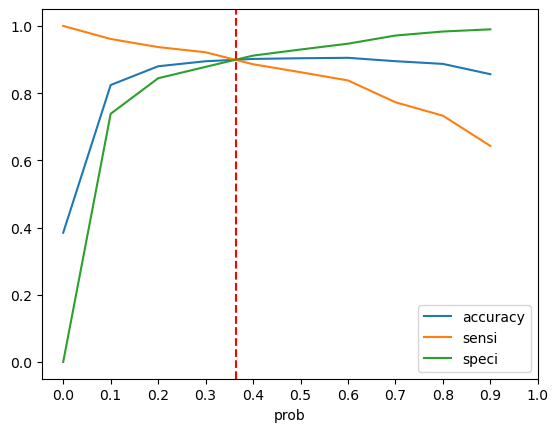

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1.1,step=0.1))
plt.axvline(x=0.365, color='r',linestyle='--')
plt.show()

In [ ]:
#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.365 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.044306         6246          0    1    0    0    0    0   
1          1        0.982957         8177          1    1    1    1    1    1   
2          0        0.000533         6809          0    1    0    0    0    0   
3          1        0.996156         5792          1    1    1    1    1    1   
4          0        0.391667         4491          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0           4  
1    1    1    1    1    1                1          98  
2    0    0    0    0    0                0           0  
3    1    1    1    1    1                1         100  
4    0    0    0    0    0                1          39

In [ ]:
# Assigning the Lead_Score  based on Converted_Prob

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [ ]:
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.044306         6246                0           4
1          1        0.982957         8177                1          98
2          0        0.000533         6809                0           0
3          1        0.996156         5792                1         100
4          0        0.391667         4491                1          39

In [ ]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.9

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3529,  387],
       [ 228, 2219]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.91

In [ ]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.9

In [ ]:
# Calculate false postive rate - predicting converted when customer does have not converted -- 1-Specificity
print(round(FP/ float(TN+FP),2))

0.1


In [ ]:
# Positive predictive value
print (round(TP / float(TP+FP),2))

0.85


In [ ]:
# Negative predictive value
print (round(TN / float(TN+ FN),2))

0.94


In [ ]:
## Precision - TP/TP+FP
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)

0.88

In [ ]:
## Recall - TP/TP+FN
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)

0.86

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
round(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.88

In [ ]:
round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.86

### Observation on Train set
##### Accuracy : 90%
##### Sensitivity  : 90%
##### Specificity : 90%
##### Precision : 88%
##### Recall : 87%

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted.head()

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6358    1
 6359    1
 6360    1
 6361    0
 6362    1
 Name: Converted, Length: 6363, dtype: int64,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: predicted, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

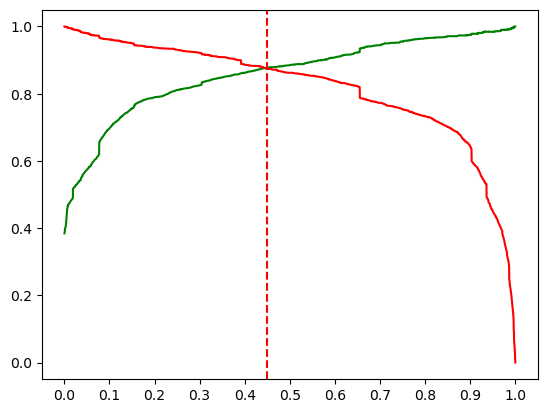

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1.1,step=0.1))
plt.axvline(x=0.45, color='r',linestyle='--')
plt.show()

In [ ]:
## The cutoff between precision and recall tradeoff is 0.46

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = result3.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

0    0.018866
1    0.006035
2    0.990277
3    0.037942
4    0.004989
5    0.502230
6    0.822218
7    0.081002
8    0.995371
9    0.779182
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

0
0  0.018866
1  0.006035
2  0.990277
3  0.037942
4  0.004989

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect_ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

Converted  Prospect_IND  Prospect_ID         0
0          0          3948            0  0.018866
1          0          2663            1  0.006035
2          1          3350            2  0.990277
3          0          6518            3  0.037942
4          0          2466            4  0.004989

In [ ]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect_ID','Converted','Converted_Prob']]

In [ ]:
## head of y_pred_final
y_pred_final.head()

Prospect_ID  Converted  Converted_Prob
0            0          0        0.018866
1            1          0        0.006035
2            2          1        0.990277
3            3          0        0.037942
4            4          0        0.004989

In [ ]:
# Calculating final_Predicted based on Converted_Prob for cutoff point 0.46

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.46 else 0)

In [ ]:
# The head of y_pred_final dataframe

y_pred_final.head()

Prospect_ID  Converted  Converted_Prob  final_Predicted
0            0          0        0.018866                0
1            1          0        0.006035                0
2            2          1        0.990277                1
3            3          0        0.037942                0
4            4          0        0.004989                0

In [ ]:
## Test model evaluation

In [ ]:
# Overall accuracy for test data set

round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)

0.92

In [ ]:
# Confusion matrix for test data:-

confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion4

array([[1585,   94],
       [ 112,  936]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Sensitivity for logistic regression model
round(TP / float(TP+FN),2)

0.91

In [ ]:
# Specificity for logistic regression model

round(TN / float(TN+FP),2)

0.9

In [ ]:
# False Postive Rate - predicting conversion when customer does not have convert

print(round(FP/ float(TN+FP),2))

0.1


In [ ]:
# positive predictive value for test data set

print (round(TP / float(TP+FP),2))

0.85


In [ ]:
# Negative predictive value for test data set

print (round(TN / float(TN+ FN),2))

0.94


In [ ]:
# Precision for test data set
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)

0.88

In [ ]:
# Recall for test data set
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)

0.86

In [ ]:
# Precision score for test data set

round(precision_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)

0.91

In [ ]:
## Recall score for test data set

round(recall_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)

0.89

In [ ]:
top_feature = result3.params[1:]
top_feature = round((top_feature / top_feature.max())*100,2)
top_feature

Do Not Email                                            -15.89
Total Time Spent on Website                              42.83
Page Views Per Visit                                    -15.02
Lead Origin_Lead Add Form                                16.66
Last Activity_Email Bounced                             -15.23
Last Activity_Olark Chat Conversation                   -15.40
What is your current occupation_Other                   -32.77
What is your current occupation_Working Professional     13.50
Tags_Closed by Horizzon                                 100.00
Tags_Others                                              37.88
Tags_Will revert after reading the email                 62.47
Last Notable Activity_Others                             14.52
Last Notable Activity_SMS Sent                           21.43
dtype: float64

In [ ]:
### Observation on Train set
##### Accuracy : 92%
##### Sensitivity  : 90%
##### Specificity : 90%
##### Precision : 88%
##### Recall : 87%

In [ ]:
### Observation on Test set
##### Accuracy : 92%
##### Sensitivity  : 91%
##### Specificity : 90%
##### Precision : 88%
##### Recall : 86%